<a href="https://colab.research.google.com/github/praveenkumarbalakrishnan/tasks/blob/main/SIG731_Data_Wrangling_Task1P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Title:** Task 1P: SIG731-Data Wrangling

**Name:** Praveenkumar Balakrishnan

**Student Number:** 223029369

**Email Address:** s223029369@deakin.edu.au


# Import statements

In [11]:
import matplotlib.pyplot as plt

# Tasks

**Task 1**

Input three Python lists of identical lengths (at least five items each) giving basic data on your friends/family, for example:

 names =["Basia","Ania","Grzesiek","Elvira","Katherine"]

 heights = [1.73, 1.61, 1.80, 1.58, 1.77] # in metres 

 weights = [61, 76, 78, 58, 57 ] # in kilograms

It is assumed that names[i] gives the name of the i-th person whose height in metres is heights[i] and weight in kilograms is weights[i].
You should enter different data, not exactly the values above.

Create list of identical lengths represent names, heights and weights mapped to it's index

In [9]:
names =["Satish","Snekha","Angelin","Arun","Annie"]
heights = [1.76, 1.69, 1.54, 1.72, 1.53] # in metres 
weights = [98, 52, 60, 70, 68] # in kilograms

**Task 2**

Create a Python list bmis such that bmis[i] gives the bodymass index of the 
i-thperson.

Function to validate the given heights and weights

In [12]:
def validate_data(input_list, lower_val, upper_val):
  """
  This function is to validate whether the given data is between the lower
  and upper value

  Parameters
  ----------
  input_list: list(float)
    Input list with corresponding values
  lower_val: float
    Minimum allowed value
  upper_val: float
    Maximum allowed value
  """
  for val in input_list:
    if val < lower_val or val > upper_val:
      raise Exception(f"Incorrect data, value {val} is not supported")


Function to generae bmis, for mula for bmi is weight(kg) / height(m)**2

In [13]:
def get_bmi(weights, heights):
  """
  This function is to generate bmi for the corresponding weigthts and heights,
  values in the input lists should be mapped to it's index. Data will be 
  validated for equal length, minimum and maximum values before generating the 
  bmis. Incase of an validation failure exception will be thrown and bmis will
  not be calculated.
  Note: BMI is rounded off to 2 decimal points

  Parameters
  ----------
  weights: list(float)
    List of weights
  heigts: list(float)
    List of heights

  Returns
  -------
  bmis : list(float)
    List of bmis for the corresponding weight and height
  """
  bmis = []
  if len(weights) != len(heights):
    raise Exception("Given weights and heights list are in different length")
  validate_data(weights, 1, 1000) # data validation for weights 
  validate_data(heights, 0.01, 2.5) # data validation for heights 
  for i in range(len(weights)):
    bmis.append(round((weights[i]) / (heights[i] ** 2), 2))
  return bmis

Calling the function using the previously defined heights and weights to get the bmis

In [15]:
bmis = get_bmi(weights, heights)
print(f"BMI of the given names: {bmis}")

BMI of the given names: [31.64, 18.21, 25.3, 23.66, 29.05]


The above bmis list will give the body mass index of the ith person based on their corresponding weights and heights

**Task 3**

Draw a barplot

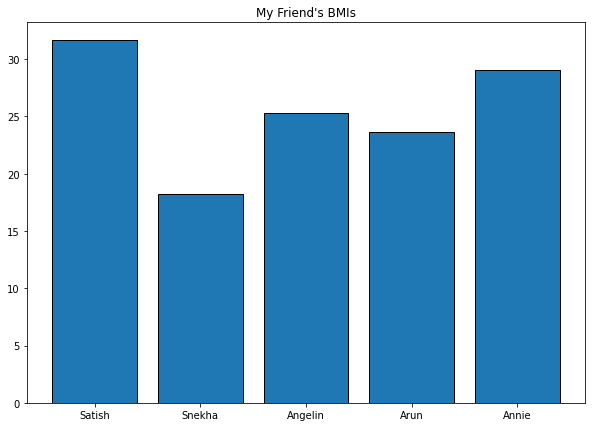

In [16]:
plt.figure(figsize=(10, 7))
plt.title('My Friend\'s BMIs')
plt.bar(names, width=0.8, height=bmis, edgecolor="black", align='center')
plt.show()

Above is the bar plot of each person and their BMIs

**Task 4**

Based on the BMI categories as defined by the WHO(underweight if below 18.5,normal rangeup to 25.0, etc.), write some code that outputs a series of strings like "{name} has BMI of {bmi} which is {bmi_category}.":

Function to print the bmi and bmi category of the corresponding person

In [17]:
def get_bmi_category(names, bmis):
  """
  This function is to print the bmi and it's category defined by WHO, which is 
  underweight - below 18.5
  normal weight - 18.5 to 24.9
  overweight - 25 to 29.9
  obese - 30 or more

  Parameters
  ----------
  names: list(string)
    Names list
  bmis: list(float)
    BMIs list
  """
  for i in range(len(names)):
    bmi_category = ("underweight" if bmis[i] < 18.5 else 
                    "normal weight" if bmis[i] >= 18.5 and bmis[i] <=24.9 else
                    "overweight" if bmis[i] >= 25 and bmis[i] <=29.9 else
                    "obese")
    print(f"{names[i]} has BMI of {bmis[i]} which is {bmi_category}.")

In [18]:
get_bmi_category(names, bmis)

Satish has BMI of 31.64 which is obese.
Snekha has BMI of 18.21 which is underweight.
Angelin has BMI of 25.3 which is overweight.
Arun has BMI of 23.66 which is normal weight.
Annie has BMI of 29.05 which is overweight.


Based on the above observation Satish is obese(bmi >= 30), Snekha is underweight(bmi < 18.5), Angelin is overweight(25 <= bmi <= 29.9), Arun is normal weight(18.5 <= bmi <= 24.9) and Annie is overweight(25 <= bmi <= 29.9)

---



**Task 5**

For each person, calculate also the BMI prime measure as defined in https://en.wikipedia.org/wiki/Body_mass_index.

BMI prime is the ratio of actual BMI to upper limit optimal BMI (currently defined at 25 kg/m2). BMI prime = BMI / 25. Below is the function to calculate BMI prime

In [19]:
def get_bmi_prime(bmis):
  """
  This function is to generate bmi prime for the given bmis, which is ratio of
  actual BMI to upper limit optimal BMI(25)
  Note: BMI prime is rounded off to 2 decimal points

  Parameters
  ----------
  bmis: list(float)
    List of bmis

  Returns
  -------
  bmi_primes : list(float)
    List of BMI primes for the corresponding bmi
  """
  bmi_primes = []
  for i in range(len(bmis)):
    bmi_primes.append(round(bmis[i] / 25, 2))
  return bmi_primes

Function to print BMI prime and percentage over or under their upper mass limit

In [22]:
def get_bmi_prime_category(names, bmi_primes):
  """
  This function is to print the bmi prime and their percentage over or under
  their upper mass limit

  Parameters
  ----------
  names: list(string)
    Names list
  bmi_primes: list(float)
    BMI primes list
  """
  for i in range(len(names)):
    bmi_prime_percentage = int(abs(round(1 - bmi_primes[i], 2)) * 100)
    over_under_str = "over" if bmi_primes[i] - 1 > 0 else "under"
    bmi_prime_category = (
        "underweight" if bmi_primes[i] < 0.74 else
        "optimal weight" if bmi_primes[i] >= 0.74 and bmi_primes[i] <= 0.99 else
        "overweight")
    print(f"{names[i]} has BMI prime of {bmi_primes[i]}", 
          f"which is {bmi_prime_category} and",
          f"{bmi_prime_percentage}% {over_under_str} their upper mass limit")

In [23]:
bmi_primes = get_bmi_prime(bmis)
print(f"BMI prime of the given names: {bmi_primes}")
get_bmi_prime_category(names, bmi_primes)

BMI prime of the given names: [1.27, 0.73, 1.01, 0.95, 1.16]
Satish has BMI prime of 1.27 which is overweight and 27% over their upper mass limit
Snekha has BMI prime of 0.73 which is underweight and 27% under their upper mass limit
Angelin has BMI prime of 1.01 which is overweight and 1% over their upper mass limit
Arun has BMI prime of 0.95 which is optimal weight and 5% under their upper mass limit
Annie has BMI prime of 1.16 which is overweight and 16% over their upper mass limit


Based on the above observation, Satish is overweight and 27% over their upper mass limit, Snekha is underweight and 27% under their upper mass limit, Angelin is overweight and 1% over their upper mass limit, Arun is optimal weight and 5% under their upper mass limit and Annie is overweight and 16% over their upper mass limit.



**Task 6**

Draw a separate barplot of the BMI prime indices of the persons in our database.

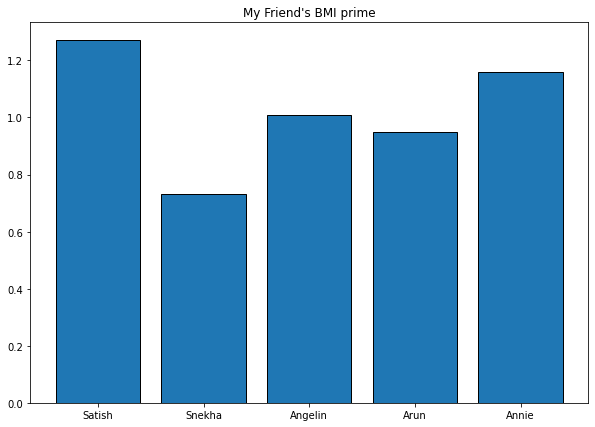

In [24]:
plt.figure(figsize=(10, 7))
plt.title('My Friend\'s BMI prime')
plt.bar(names, width=0.8, height=bmi_primes, edgecolor="black", align='center')
plt.show()

Above is the bar plot of each person and their BMI prime, since BMI prime is the ratio between BMI and the uppper limit optimal BMI only the magnitude of y axis changes but the pattern remains same. It can be interpreted better as explained in get_bmi_prime_category

**Task 7**

The Wikipedia article on BMI correctly identifies this index as a very simple measure.In your own words, discuss what are the benefits and limitations of BMI and BMI prime from both the medical and societal perspective, including its possible misuses (write at least 3 text paragraphs).

BMI is defined as body mass(kg) divided by the square of the body height(m). Cutoff point for BMI to classify underweight is below 18.5, normal weight is 
18.5 to 24.9, overweight is 25 to 29.9 and obese is 30 or more. Because of its simplicity it's been widely used as general measurement for obesity. Generally physician uses BMI to weight the risk of obesity related problems and identify health risk and take action to mitigate that. In other hand BMI is more suitable for population studies and less appropriate for individual evaluation. BMI in addition to other measure such as waist circumference, etc will be more appropriate in individual evaluation.In some cases like lean male athlete often have high muscle-to-fat ratio for those BMI is not appropriate and also for children cutoff for BMI category is calculated differently which is less than 5th percentile is considered as underweight, above 95th percentile is considered as obese and 85th to 95th percentile is considered as overweight. The recommended values are not common for all and it vary from time to time, country to country and some categories of people. Also people from different world have different association with BMI, body to fat ratio and health risk.There are different studies conducted to associate the health rish with BMI and some studies shows that normal BMIs is at higher risk for death from cardiovascular disease than people considered as overweigth based on the BMI cutoff of 25 to 29.9.

BMI is proportional to the mass and inversely proportional to the square of the height so when all the body dimensions doubles BMI also doubles instead of remaining same. This results in taller people are reported with higher BMI eventhough their actual body fat level is normal and the same applies for people with smaller frames carrying more fat than optimal and still BMI classify them as optimal weight. It been been identified that BMI overestimates 10% on people with taller frame and underestimates 10% on people with smaller frame. If we consider only BMI for individual it might lead us to give wrong suggestion for these peoples taller peoples may end up in reducing their optimal weight and smaller frame people will end up in more health risk as their actual body fat is high and not reported in BMI.BMI is poor in sensitivity which means it may correctly identify people who are obese but not perform very well in identifying people who are not obese. It is not clear on what cutoff to be set for overweight and obese since it's vary from people to people. It's been suggested that Waist circumference is the better measurement for obesity related disease over BMI. There are several alternatives available for BMI and they all have their own pros and cons.

BMI prime is one of the alternative for BMI, BMI prime is the modification of BMI system which is ratio of the BMI to upper limit optimal BMI(which is currently 25 kg/m2). Cutoff point for BMI prime is been classified as underweight if less than 0.74 and optimal weight if between 0.74 and 0.99 and overweight if on or above 1. In BMI prime we can see what ratio or percentage a person deviates from the maximum optimal BMI. Since it's also uses a BMI all the limitations are still applicable but can be used for different puprposes like set a limit on how much fat to decrease to maintain the upper limit optimal BMI. BMI can be misused by companies selling weight loss product like promoting their product to consumers having optimal body weight and misleading BMI. Defined regulations on promotions or consumption of this product will be helpful for the users to stay with optimal body fat. In current trend becoming thinner is popular in lot of fashion shows, countries like France, Italy, Spain and Israel have legislation of banning the models having BMI below 18/18.5 which will help the peoples in fashion show and younger generation who wants to be in fashion show to stay in healthy weight and fight disease like anorexia.